# 2.3 Перцептрон: обучение

# ВОПРОС

## Отметьте, какое из приведенных ниже правил обновления весов будет эквивалентно приведенному алгоритму?
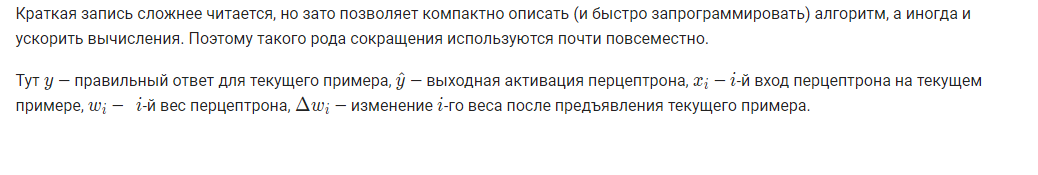

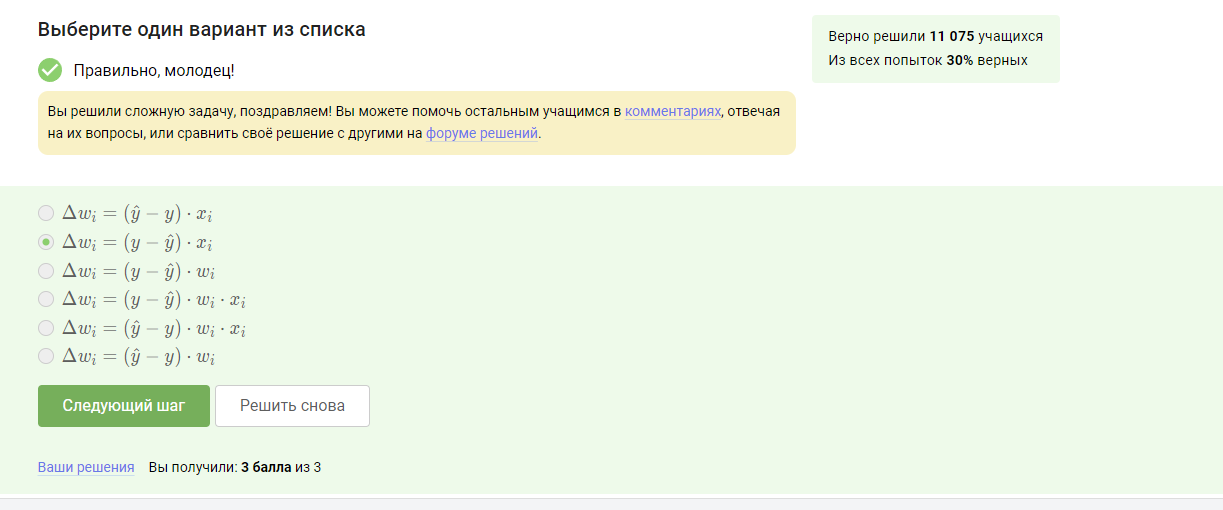

# ВОПРОС

Мы погуляли в фруктовом саду и собрали следующие данные про несколько обнаруженных там фруктов:

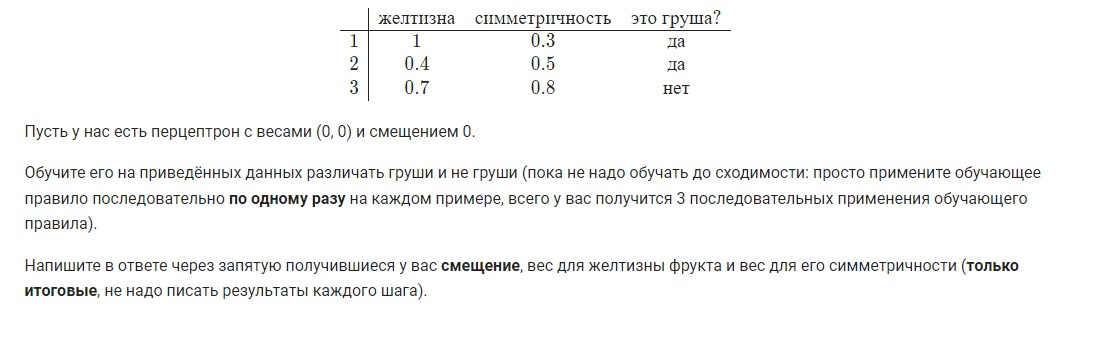

In [1]:
import numpy as np

x = np.array([[1, 1, 0.3], [1, 0.4, 0.5], [1, 0.7, 0.8]])
y = np.array([1, 1, 0])
w = np.array([0, 0, 0])
for _ in range(len(x)):
  p = int(w.T @ x[_] > 0)  
  if p != y[_]:
    w = w - x[_] if p else w + x[_]
print(*w.round(2), sep=',')

0.0,0.3,-0.5


In [6]:
def three_steeps():
    #w = w + (y - y_pred)*x
    X = np.array([[1, 1, 0.3], [1, 0.4, 0.5], [1, 0.7, 0.8]])
    y = np.array([1, 1, 0])
    w = np.array([0, 0, 0])
    for indx in range(len(X)):
        y_pred = 1 if (np.sum(w.dot(X[indx]))) else 0
        print(np.sum(w.dot(X[indx])))
        if not y_pred == y[indx]:
            print(w)
            w = w + (y[indx] - y_pred)*X[indx]
            print(w)
    print(w)

In [7]:
three_steeps()

0.0
[0 0 0]
[1.  1.  0.3]
1.5499999999999998
1.94
[1.  1.  0.3]
[ 0.   0.3 -0.5]
[ 0.   0.3 -0.5]


###### Много решений кодом, решила оставить решение рассуждением:

1: w = [0, 0, 0] (из условия), e=[1, 1, 0.3] (первая строка из условия, еденица в начале - смещение (bias)).  w*e = 1*0+1*0+0.3*0 = 0 => predict = 0, predict!=target, w* = w + e = [0+1, 0+1, 0+0,3] = [1, 1, 0,3]

2: w = [1, 1, 0,3] (из предыдущего шага), e=[1, 0.4, 0.5] (вторая строка из условия).  w*e = 1*1+1* 0.4+0.3*0.5 = 1.55 =>predict =1,  predict = target - ничего не меняем

3:  w = [1, 1, 0,3], e=[1, 0.7, 0.8] (третья строка).  w*e = 1*1+1*0.7+0.3*0.8 = 1.94 => predict = 1, predict!=target, w* = w - e = [1-1, 1-0.7, 0,3-0.8] = [0, 0.3, -0.5]

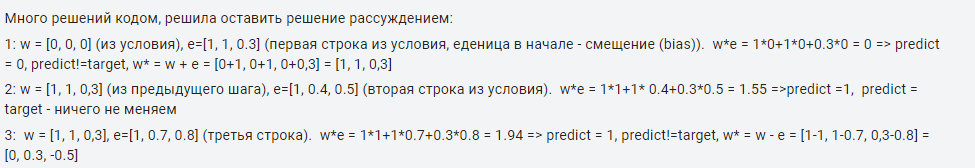

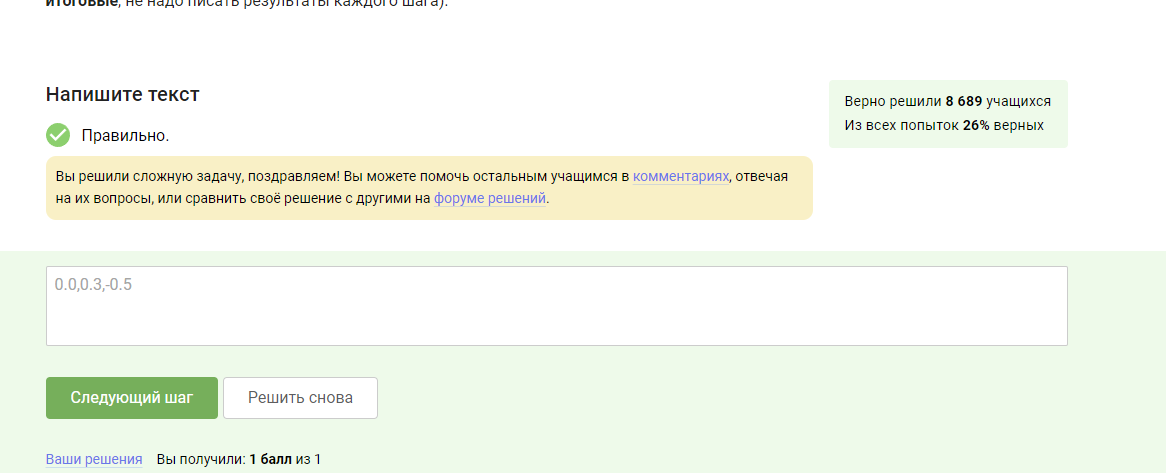

In [8]:
import numpy as np

yellowness = np.array([1, 0.4, 0.7])  # Создаём вектор желтизны обнаруженных фруктов
symmetry = np.array([0.3, 0.5, 0.8])  # Создаём вектор симметричности обнаруженных фруктов
is_pear = np.array([1, 1, 0])         # Создаём вектор "грушевости" обнаруженных фруктов

bias = np.ones(3)                     # Создаём вектор смещений для нашего перцептрона
weigths = np.array([0, 0, 0])         # Инициализируем вектор весов для нашего перцептрона

observation_matrix = np.column_stack((bias, yellowness, symmetry)) # Составляем матрицу наблюдений обнаруженных фруктов

def y_hat(num):
    """ Функция, вычисляющая выходную активацию перцептрона.
        Перцептрон активируется, если на вход подать число, большее 0.
        Аргумент функции - скалярное произведение входа перцептрона на матрицу весов.
    """
    return 1 if num > 0 else 0

for i in range(observation_matrix.shape[0]):
    # Для каждой строки нашей матрицы наблюдений производим перерасчёт весов в соответствии с формулой:
    # delta_weight_i = (y - y_hat) * x_i
    weigths = weigths + (is_pear[i]  - y_hat(observation_matrix[i,:].dot(weigths))) * observation_matrix[i,:]
    # где:
    # is_pear[i] - правильный ответ для текущего примера,
    # y_hat(observation_matrix[i,:].dot(weigths)) - выходная активация нейрона (0 либо 1),
    # observation_matrix[i,:] - i-й вход перцептрона на текущем примере.

for i, w_i in enumerate(weigths):
    print("w_{} = {}".format(i, w_i))

w_0 = 0.0
w_1 = 0.30000000000000004
w_2 = -0.5


# ВОПРОС

Отметьте верные утверждения

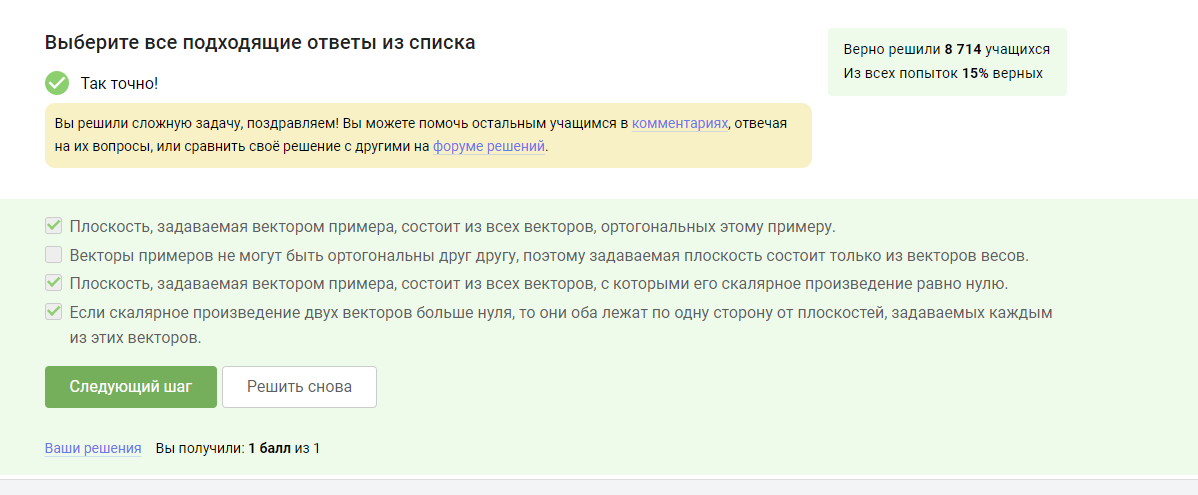

# ВОПРОС

Пример и плоскость, которую он задаёт, можно рассматривать как ограничение на то, какими могут быть хорошие веса.

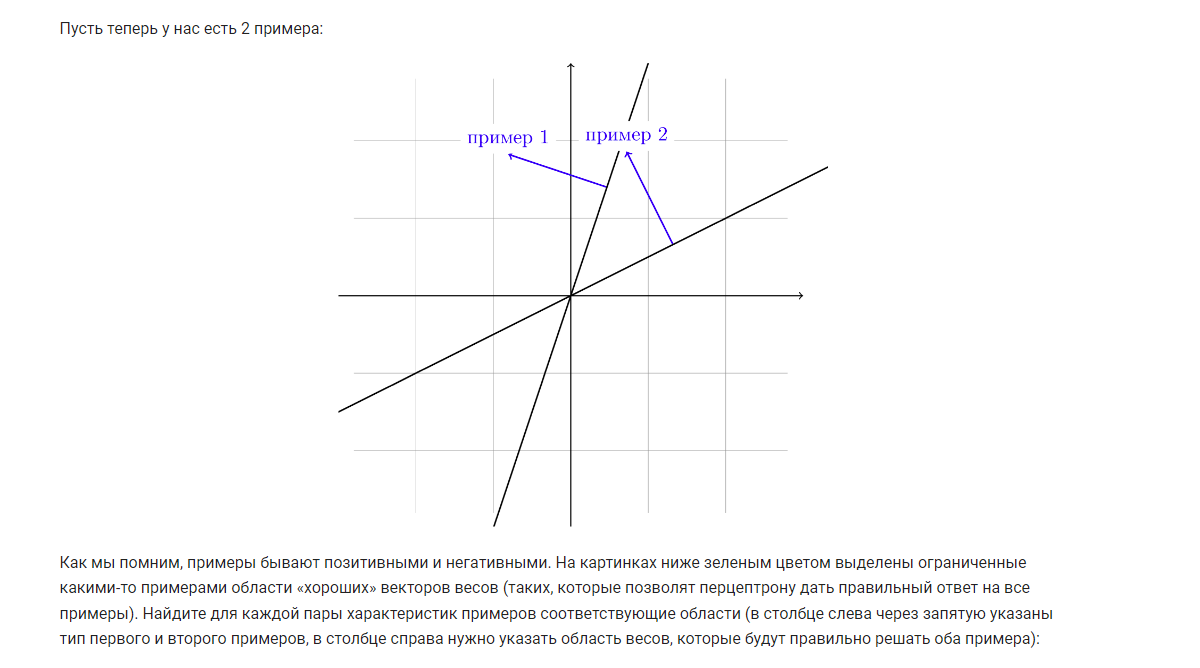

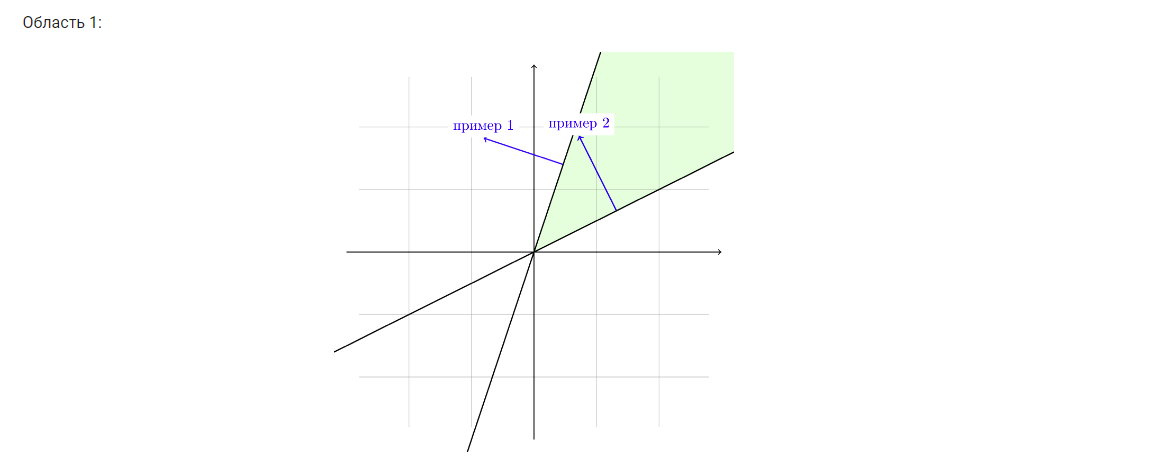

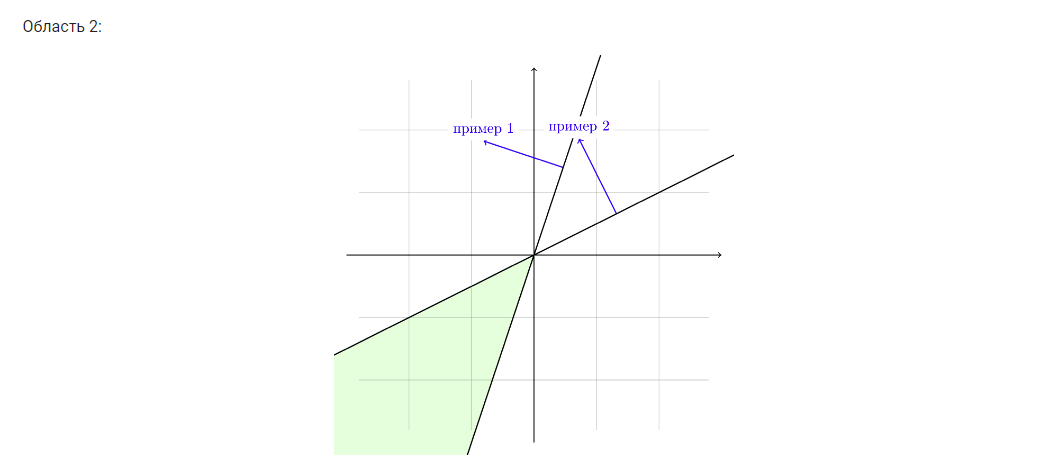

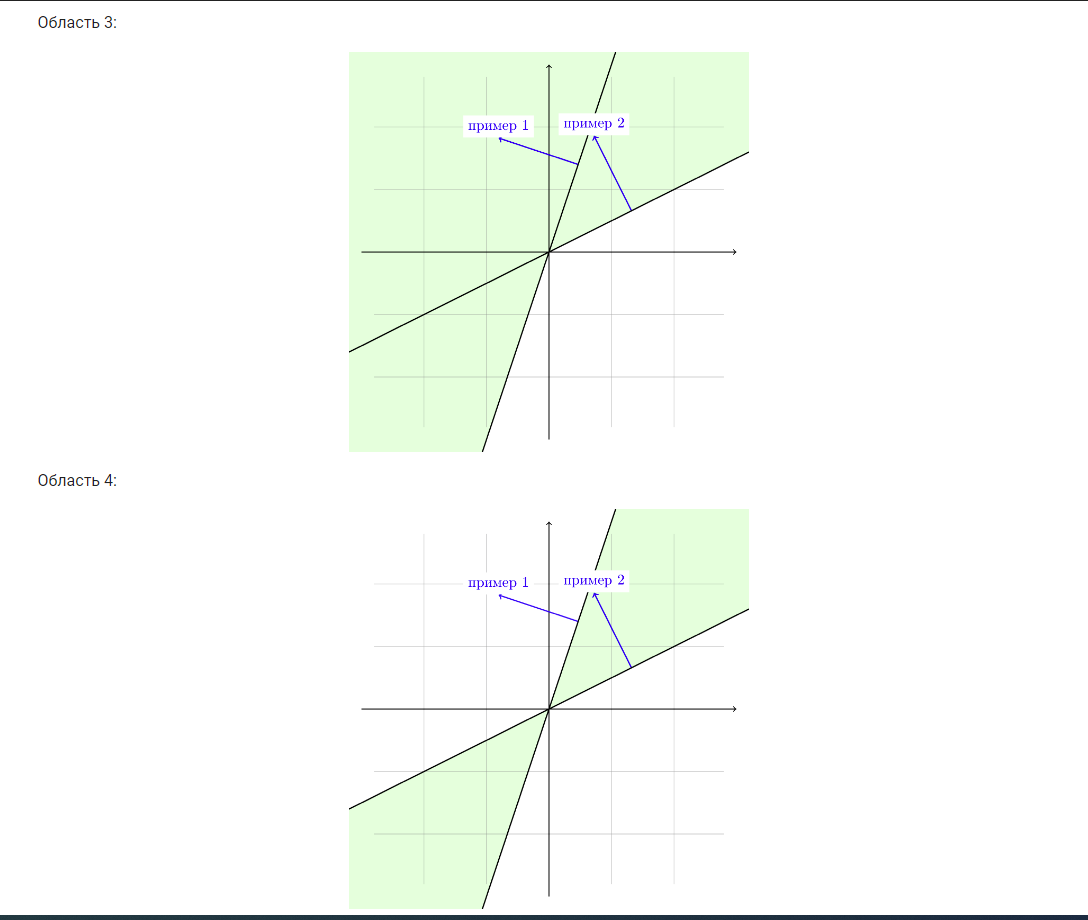

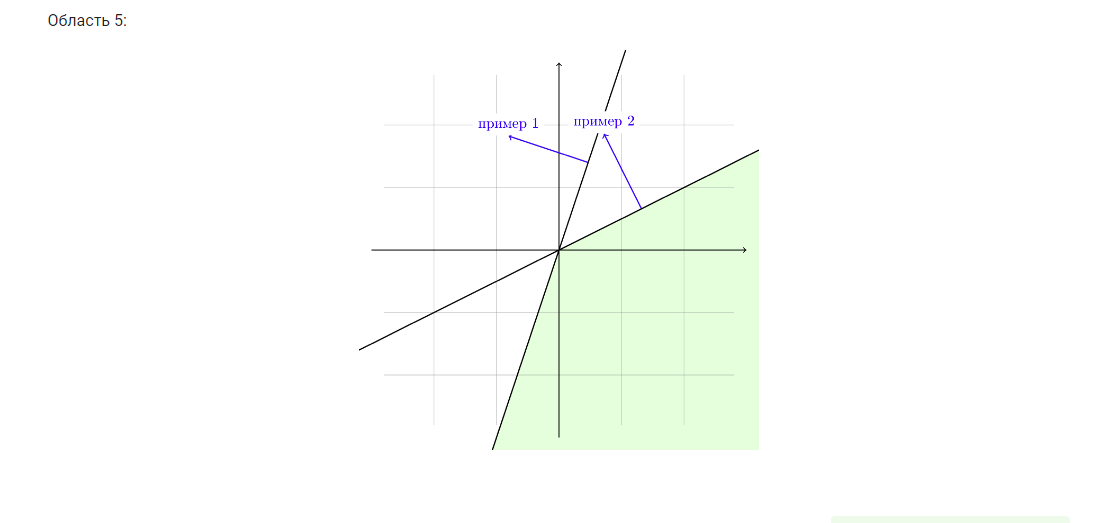

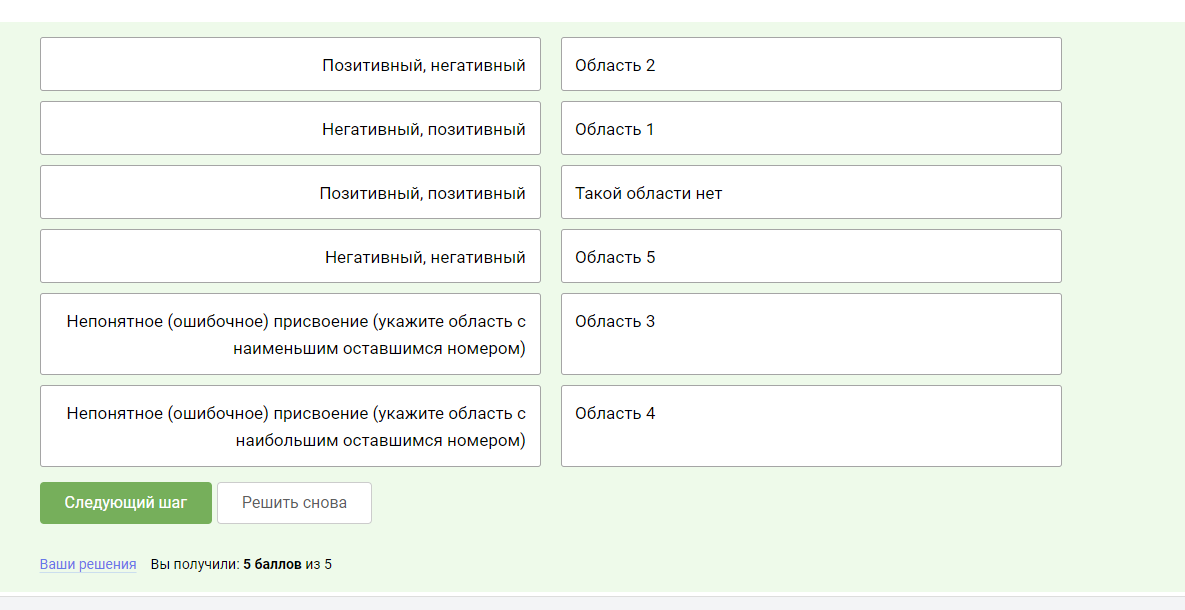

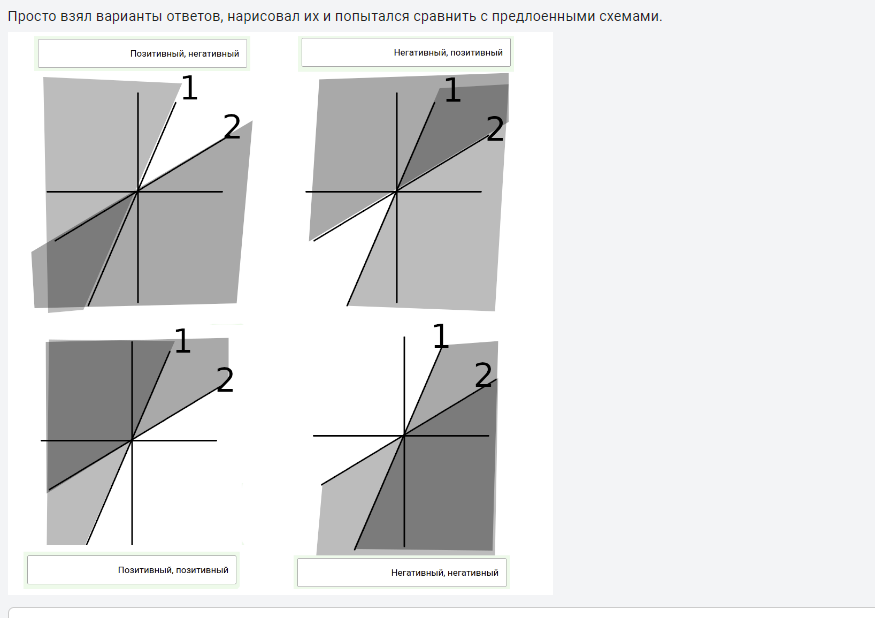

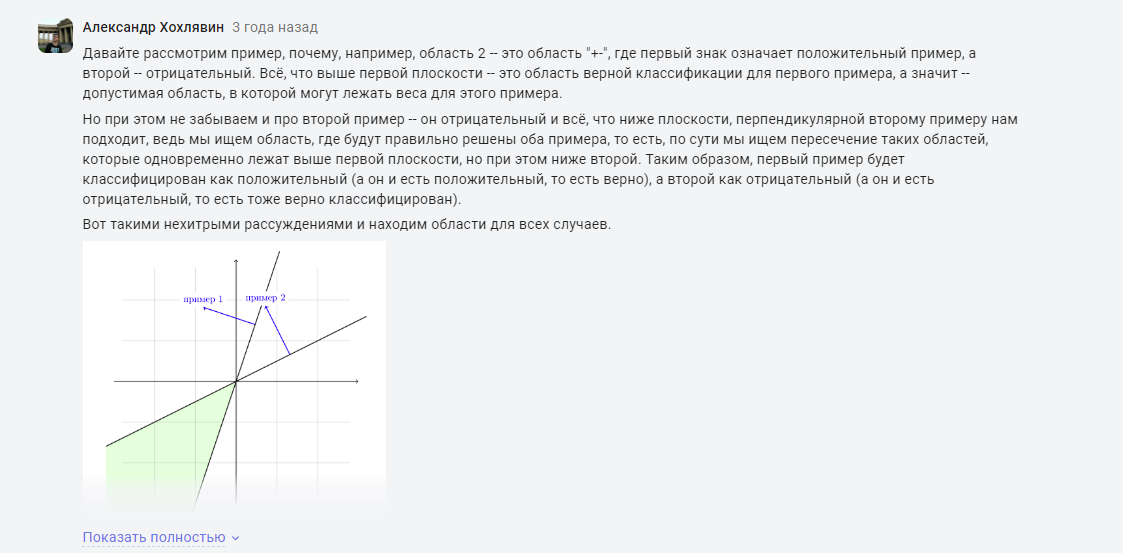

# "Больше ограничений"!

Задание на доказательство (для продвинутых):

Помимо XOR существует множество других задач, с которыми перцептрон не может справиться. К примеру, он не может отличить два паттерна, если мы разрешаем перенос их через край (дальше - подробнее)

Представьте себе две разных бинарных бегущих строки (два разных паттерна):

Строка типа AA:



Строка типа BB:



Мы можем передвигать эти паттерны, перенося через край. При этом тип паттерна считается прежним:



Можно представить, что мы просто склеиваем края нашей строки, получая непрерывную ленту (кольцо):

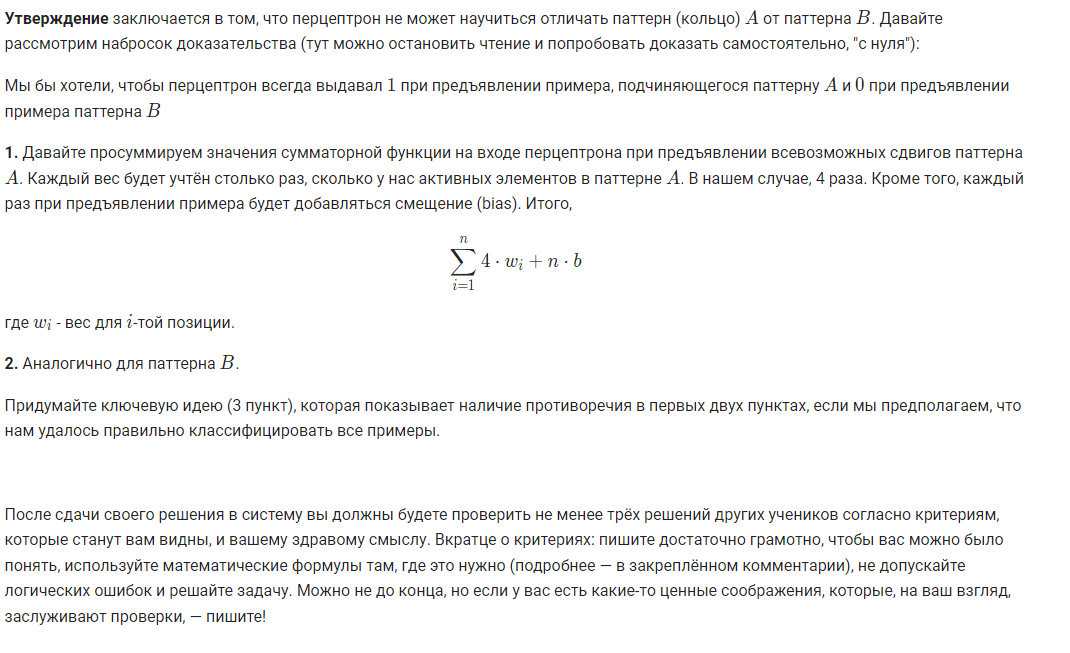

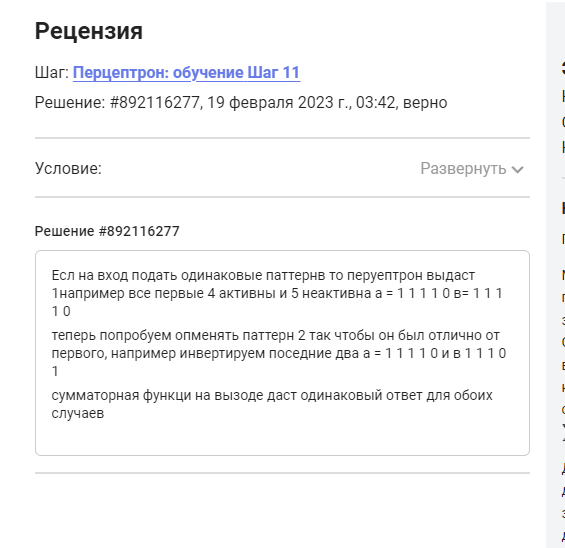

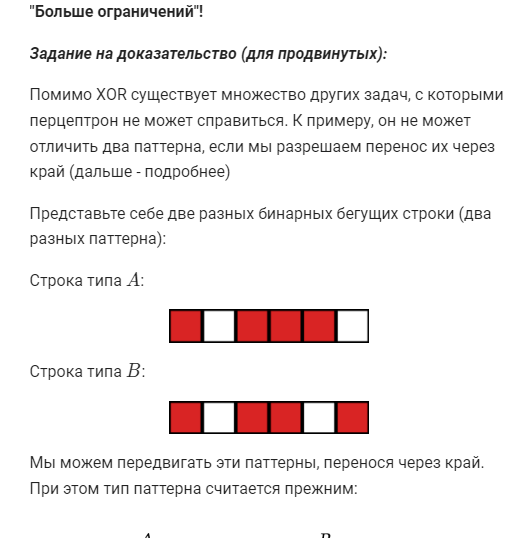

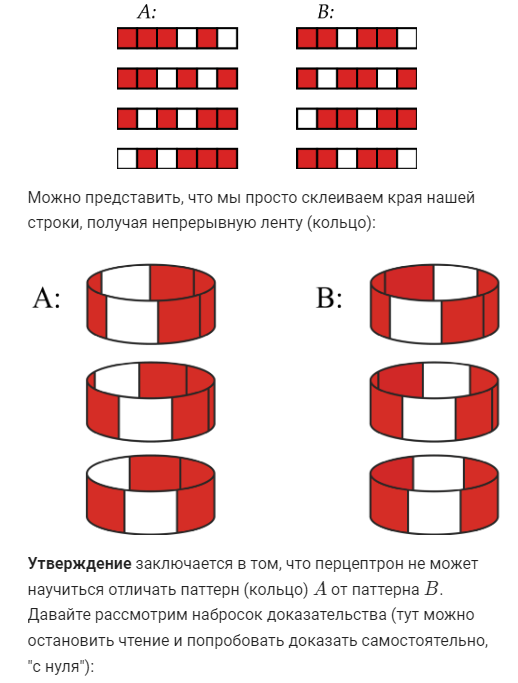

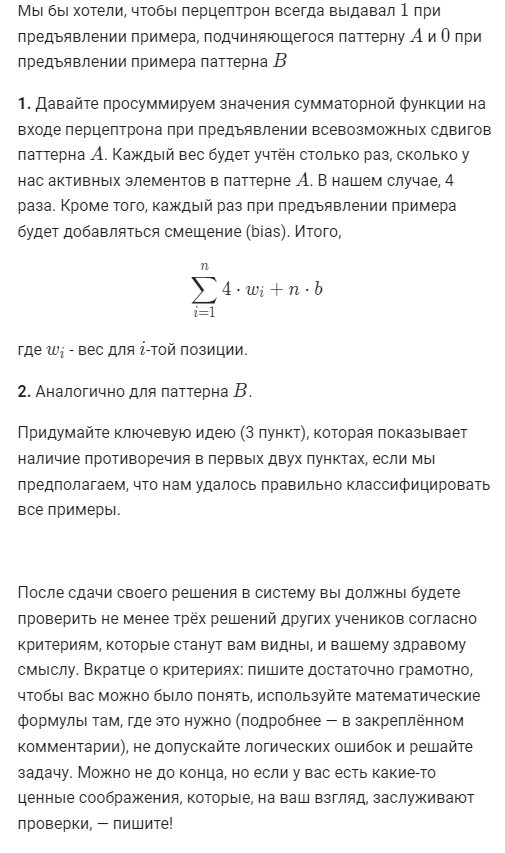

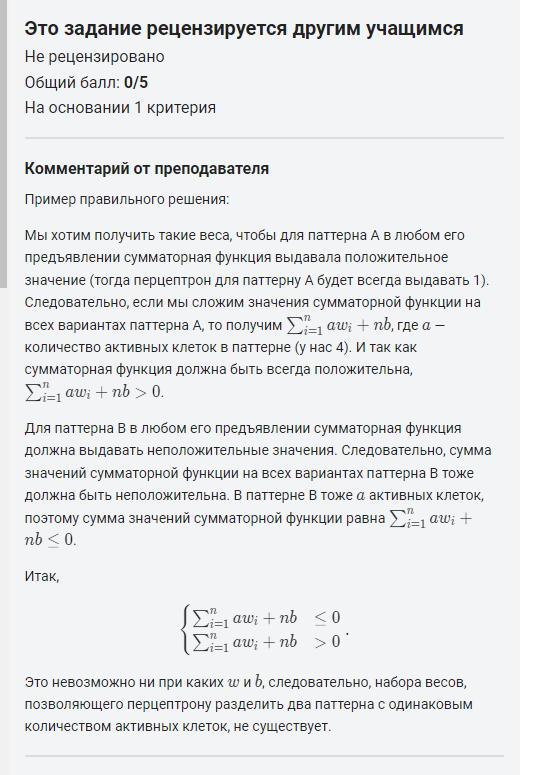

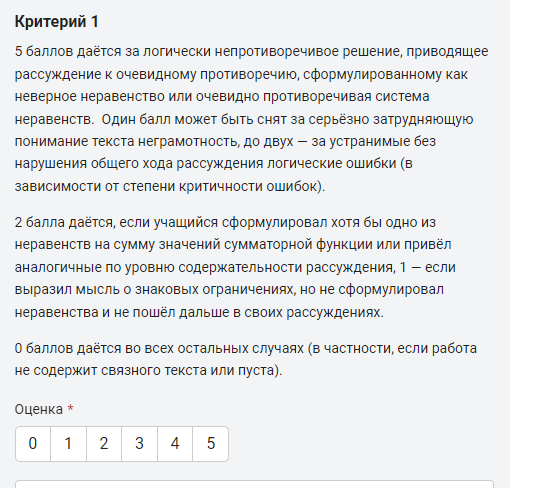